In [5]:
# Librerías
import numpy as np
import pandas as pd
import statsmodels.api as cm
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale



In [ ]:

df = pd.read_csv("../data/processed_data.csv")
df.head()

# Male: 1, Female: 0 (Gender)
# Obese: 3, Normal: 2, Overweight: 1 (BMI Category)
# Sleep Apnea: 1, None: 0, Insomnia: 2

,Unnamed: 0,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,0,1,1,27,Software Engineer,6.1,6,42,6,2,126/83,77,4200,0,126,83
1,1,2,1,28,Doctor,6.2,6,60,8,1,125/80,75,10000,0,125,80
2,2,3,1,28,Doctor,6.2,6,60,8,1,125/80,75,10000,0,125,80
3,3,4,1,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,1,140,90
4,4,5,1,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,1,140,90


In [18]:
df['BMI Category']=df['BMI Category'].replace({2:0})
df['BMI Category']=df['BMI Category'].replace({3:2})
# Pasando a que Normal:0, Overweight:1, Obese:2

In [21]:
df['Occupation'].value_counts()
# Categorizando
df['Occupation']=df['Occupation'].replace({'Nurse':0}) # Healthcare Professional
df['Occupation']=df['Occupation'].replace({'Doctor':0})
df['Occupation']=df['Occupation'].replace({'Engineer':1}) # STEM Professional 
df['Occupation']=df['Occupation'].replace({'Software Engineer':1})
df['Occupation']=df['Occupation'].replace({'Scientist':1})
df['Occupation']=df['Occupation'].replace({'Lawyer':2}) # Lawyer
df['Occupation']=df['Occupation'].replace({'Teacher':3}) # Teacher
df['Occupation']=df['Occupation'].replace({'Accountant':4}) # Accountant
df['Occupation']=df['Occupation'].replace({'Manager':5}) # Sales Professional
df['Occupation']=df['Occupation'].replace({'Sales Representative':5})
df['Occupation']=df['Occupation'].replace({'Salesperson':5})

/var/folders/p8/96d3g_wj42nfdr3ndh2m3b8m0000gn/T/ipykernel_51395/260211907.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Occupation']=df['Occupation'].replace({'Salesperson':5})


In [22]:
df['Quality of Sleep'].value_counts()
# Categorizando 
df['Quality of Sleep']=df['Quality of Sleep'].replace({4:0}) # Fair
df['Quality of Sleep']=df['Quality of Sleep'].replace({5:0})
df['Quality of Sleep']=df['Quality of Sleep'].replace({6:0})
df['Quality of Sleep']=df['Quality of Sleep'].replace({7:1}) # Good
df['Quality of Sleep']=df['Quality of Sleep'].replace({8:2}) # Excellent
df['Quality of Sleep']=df['Quality of Sleep'].replace({9:2})

In [23]:
df['Stress Level'].value_counts()
# Categorizando 
df['Stress Level']=df['Stress Level'].replace({3:0}) # Low
df['Stress Level']=df['Stress Level'].replace({4:0})
df['Stress Level']=df['Stress Level'].replace({5:1}) # Moderate
df['Stress Level']=df['Stress Level'].replace({6:1})
df['Stress Level']=df['Stress Level'].replace({7:2}) # High
df['Stress Level']=df['Stress Level'].replace({8:2}) 

In [25]:
# Deshaciendose de columnas inutiles
df_final=df.drop(['Unnamed: 0', 'Person ID','Blood Pressure'], axis=1)

In [26]:
#Visualizar dataset limpio
df_final.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,27,1,6.1,0,42,1,0,77,4200,0,126,83
1,1,28,0,6.2,0,60,2,1,75,10000,0,125,80
2,1,28,0,6.2,0,60,2,1,75,10000,0,125,80
3,1,28,5,5.9,0,30,2,2,85,3000,1,140,90
4,1,28,5,5.9,0,30,2,2,85,3000,1,140,90


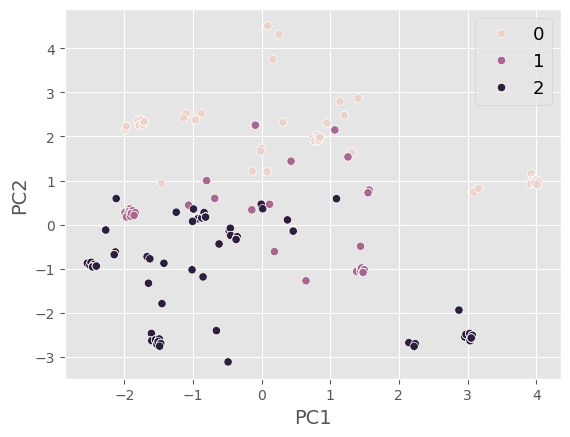

In [113]:
# Primera prediccion: calidad de sueño
df_calidad=df_final.drop(['Quality of Sleep'],axis=1)

# Estandarización
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_X = sc.fit_transform(df_calidad)  
scaled_X[:5]   

#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(scaled_X)   # Returns a NumPy array 
X_pca[:5]

PC1 = X_pca[:,0]   # Extract the first column
PC2 = X_pca[:,1]   # Extract the second column

df_PCA = pd.DataFrame({'PC1': PC1, 'PC2': PC2, 'label': df_final['Quality of Sleep']})
df_PCA.head()

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_PCA, x="PC1", y="PC2", hue="label")
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.legend(fontsize=13, title_fontsize='40')
plt.show()

In [114]:
# Análisis
pca.explained_variance_ratio_
# El primer componente explica 0.32 de la variación total y el segundo componente 0.22


array([0.32280678, 0.22980944, 0.16417012, 0.0929431 , 0.05863189,
       0.04664398])

In [115]:
for index, component in enumerate(np.round(pca.components_, 2)):
    res = []
    for value, col_name in zip(component, df_calidad.columns):
        res.append(f'{value} {col_name}')
    print(f'PC{index+1}: ' + ' + '.join(res))


PC1: -0.2 Gender + 0.33 Age + -0.07 Occupation + -0.13 Sleep Duration + 0.19 Physical Activity Level + 0.11 Stress Level + -0.35 BMI Category + 0.16 Heart Rate + 0.14 Daily Steps + 0.41 Sleep Disorder + 0.46 Systolic Pressure + 0.48 Diastolic Pressure
PC2: 0.35 Gender + -0.36 Age + 0.08 Occupation + -0.48 Sleep Duration + -0.1 Physical Activity Level + 0.54 Stress Level + 0.02 BMI Category + 0.45 Heart Rate + -0.03 Daily Steps + 0.09 Sleep Disorder + 0.01 Systolic Pressure + -0.02 Diastolic Pressure
PC3: 0.22 Gender + -0.11 Age + -0.42 Occupation + 0.16 Sleep Duration + 0.57 Physical Activity Level + 0.07 Stress Level + 0.2 BMI Category + 0.09 Heart Rate + 0.54 Daily Steps + -0.23 Sleep Disorder + 0.0 Systolic Pressure + 0.07 Diastolic Pressure
PC4: -0.13 Gender + -0.09 Age + 0.52 Occupation + -0.24 Sleep Duration + 0.21 Physical Activity Level + 0.03 Stress Level + -0.42 BMI Category + -0.27 Heart Rate + 0.5 Daily Steps + -0.0 Sleep Disorder + -0.28 Systolic Pressure + -0.17 Diastolic

In [ ]:
import numpy as np

# Tomar los 6 primeros PCs porque capturan más señal
loadings = np.abs(pca.components_[:6])

# Mirar la mayor carga absoluta que tiene cada variable en esos 6 PCs
max_loading_per_feature = loadings.max(axis=0)

# Seleccionar variables con |loading| > 0.5
important_features = df_calidad.columns[max_loading_per_feature > 0.5]

important_features


Index(['Gender', 'Occupation', 'Physical Activity Level', 'Stress Level',
       'Heart Rate', 'Daily Steps'],
      dtype='object')

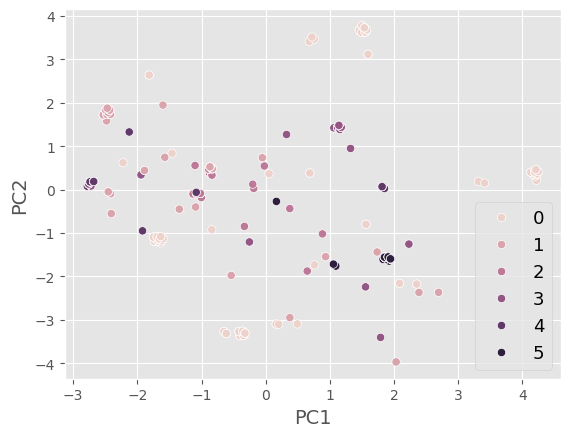

In [68]:
# Segunda prediccion: ocupación
df_ocupacion=df_final.drop(['Occupation'],axis=1)

# Estandarización
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_X = sc.fit_transform(df_ocupacion)  
scaled_X[:5]   

#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_X)   # Returns a NumPy array 
X_pca[:5]

PC1 = X_pca[:,0]   # Extract the first column
PC2 = X_pca[:,1]   # Extract the second column

df_PCA = pd.DataFrame({'PC1': PC1, 'PC2': PC2, 'label': df_final['Occupation']})
df_PCA.head()

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_PCA, x="PC1", y="PC2", hue="label")
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.legend(fontsize=13, title_fontsize='40')
plt.show()

In [69]:
# Análisis
pca.explained_variance_ratio_
# El primer componente explica 0.34 de la variación total y el segundo componente 0.28


array([0.33986684, 0.27770607])

In [ ]:
for index, component in enumerate(np.round(pca.components_, 2)):
    res = []
    for value, col_name in zip(component, df_ocupacion.columns):
        res.append(f'{value} {col_name}')
    print(f'PC{index+1}: ' + ' + '.join(res))

# En el primer componente, el factor más importante es presión diastólica y diastólica
# En el segundo componente, el factor más importante es edad

PC1: -0.09 Gender + 0.18 Age + -0.29 Sleep Duration + -0.32 Quality of Sleep + 0.1 Physical Activity Level + 0.27 Stress Level + -0.32 BMI Category + 0.27 Heart Rate + 0.1 Daily Steps + 0.4 Sleep Disorder + 0.41 Systolic Pressure + 0.41 Diastolic Pressure
PC2: -0.35 Gender + 0.44 Age + 0.35 Sleep Duration + 0.37 Quality of Sleep + 0.2 Physical Activity Level + -0.4 Stress Level + -0.16 BMI Category + -0.29 Heart Rate + 0.1 Daily Steps + 0.1 Sleep Disorder + 0.2 Systolic Pressure + 0.23 Diastolic Pressure
